# Bağlanma

In [1]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [1]:
from sklearn.metrics import roc_auc_score
from keras.layers import Dense
from keras.models import Sequential

# Veri Hazırlama

## Eğitim Seti

In [33]:
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler


        



df=pd.read_csv("MLChallenge4/train.csv")



#df= df.drop(index=df[df["TXN_AMNT"]>100000].index)
#df=df.drop(index=df[df["TXN_SOURCE"]=="R"].index)

x_df = df[["DAY_OF_WEEK", "TXN_TIME", "TXN_SOURCE", "TXN_ENTRY", "TXN_AMNT", "COUNTRY","MCC_CODE" ]]

ind1 = test_x_df.loc[(test_x_df["TXN_TIME"]>=0) & (test_x_df["TXN_TIME"]<30)].index
ind2 = test_x_df.loc[(test_x_df["TXN_TIME"]>=30) & (test_x_df["TXN_TIME"]<100)].index
ind3 = test_x_df.loc[(test_x_df["TXN_TIME"]>=100) & (test_x_df["TXN_TIME"]<130)].index
ind4 = test_x_df.loc[(test_x_df["TXN_TIME"]>=130) & (test_x_df["TXN_TIME"]<200)] .index
ind5 = test_x_df.loc[(test_x_df["TXN_TIME"]>=200) & (test_x_df["TXN_TIME"]<230)].index
ind6 = test_x_df.loc[(test_x_df["TXN_TIME"]>=230) & (test_x_df["TXN_TIME"]<300)].index
ind7 = test_x_df.loc[(test_x_df["TXN_TIME"]>=300) & (test_x_df["TXN_TIME"]<330)].index
ind8 = test_x_df.loc[(test_x_df["TXN_TIME"]>=330) & (test_x_df["TXN_TIME"]<400)].index
ind9 = test_x_df.loc[(test_x_df["TXN_TIME"]>=400) & (test_x_df["TXN_TIME"]<430)].index
ind10 = test_x_df.loc[(test_x_df["TXN_TIME"]>=430) & (test_x_df["TXN_TIME"]<500)].index
ind11 = test_x_df.loc[(test_x_df["TXN_TIME"]>=500) & (test_x_df["TXN_TIME"]<530)].index
ind12 = test_x_df.loc[(test_x_df["TXN_TIME"]>=530) & (test_x_df["TXN_TIME"]<600)].index
ind13 = test_x_df.loc[(test_x_df["TXN_TIME"]>=600) & (test_x_df["TXN_TIME"]<630)].index
ind14 = test_x_df.loc[(test_x_df["TXN_TIME"]>=630) & (test_x_df["TXN_TIME"]<700)].index
ind15 = test_x_df.loc[(test_x_df["TXN_TIME"]>=700) & (test_x_df["TXN_TIME"]<730)].index
ind16 = test_x_df.loc[(test_x_df["TXN_TIME"]>=730) & (test_x_df["TXN_TIME"]<800)].index
ind17 = test_x_df.loc[(test_x_df["TXN_TIME"]>=800) & (test_x_df["TXN_TIME"]<830)].index
ind18 = test_x_df.loc[(test_x_df["TXN_TIME"]>=830) & (test_x_df["TXN_TIME"]<900)].index
ind19 = test_x_df.loc[(test_x_df["TXN_TIME"]>=900) & (test_x_df["TXN_TIME"]<930)].index
ind20 = test_x_df.loc[(test_x_df["TXN_TIME"]>=930) & (test_x_df["TXN_TIME"]<1000)].index
ind21 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1000) & (test_x_df["TXN_TIME"]<1030)].index
ind22 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1030) & (test_x_df["TXN_TIME"]<1100)].index
ind23 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1100) & (test_x_df["TXN_TIME"]<1130)].index
ind24 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1130) & (test_x_df["TXN_TIME"]<1200)].index

x_df.loc[ind1,"TXN_TIME"]= "1"
x_df.loc[ind2,"TXN_TIME"]= "2"
x_df.loc[ind3,"TXN_TIME"]= "3"
x_df.loc[ind4,"TXN_TIME"]= "4"
x_df.loc[ind5,"TXN_TIME"]= "5"
x_df.loc[ind6,"TXN_TIME"]= "6"
x_df.loc[ind7,"TXN_TIME"]= "7"
x_df.loc[ind8,"TXN_TIME"]= "8"
x_df.loc[ind9,"TXN_TIME"]= "9"
x_df.loc[ind10,"TXN_TIME"]= "10"
x_df.loc[ind11,"TXN_TIME"]= "11"
x_df.loc[ind12,"TXN_TIME"]= "12"
x_df.loc[ind13,"TXN_TIME"]= "13"
x_df.loc[ind14,"TXN_TIME"]= "14"
x_df.loc[ind15,"TXN_TIME"]= "15"
x_df.loc[ind16,"TXN_TIME"]= "16"
x_df.loc[ind17,"TXN_TIME"]= "17"
x_df.loc[ind18,"TXN_TIME"]= "18"
x_df.loc[ind19,"TXN_TIME"]= "19"
x_df.loc[ind20,"TXN_TIME"]= "20"
x_df.loc[ind21,"TXN_TIME"]= "21"
x_df.loc[ind22,"TXN_TIME"]= "22"
x_df.loc[ind23,"TXN_TIME"]= "23"
x_df.loc[ind24,"TXN_TIME"]= "24"


x_categorical = x_df.select_dtypes(exclude=["number","bool_"])
x_categorical = pd.concat((x_df[["DAY_OF_WEEK","TXN_TIME"]],x_categorical),axis=1)



df_values = x_categorical.values
instances_num, features_num =df_values.shape[0], df_values.shape[1]
ohe_list = []
enc_list = []
enc_array = np.empty((instances_num,1))
for i in range(features_num):
    ohe_list.append(OneHotEncoder(handle_unknown="ignore"))
    



#x_categorical= x_categorical.drop(index=df[df["TXN_AMNT"]>100000].index)
#x_categorical=x_categorical.drop(index=df[df["TXN_SOURCE"]=="R"].index)    

for i in range(features_num):
    enc_list.append(ohe_list[i].fit_transform(x_categorical.iloc[:,i].values.reshape(-1,1)).toarray())
        
        
for i in range(features_num):
    enc_array =np.append(enc_array,enc_list[i],axis=1)
        
enc_array = np.delete(enc_array,0,1)
        

x_categorical_enc = pd.DataFrame(enc_array)






print("Categorical Features Encoded... Categorical Dimensions = {}".format(enc_array.shape[1]))

x_numerical = x_df[["TXN_AMNT"]]
num_pipeline = Pipeline([
    ("std_scaler", MinMaxScaler()),
])
x_numerical_tr = num_pipeline.fit_transform(x_numerical)
x_numerical_tr = pd.DataFrame(x_numerical_tr)
X = pd.concat((x_categorical_enc,x_numerical_tr),axis=1)

Y = df[["TARGET"]]

print("Data Preprocessing is done")


del x_df,x_categorical, df_values, enc_array,enc_list,x_categorical_enc, x_numerical, x_numerical_tr




Categorical Features Encoded... Categorical Dimensions = 1770
Data Preprocessing is done


## Test Seti

In [34]:
test_df=pd.read_csv("MLChallenge4/test.csv")

test_x_df = test_df[["DAY_OF_WEEK", "TXN_TIME", "TXN_SOURCE", "TXN_ENTRY", "TXN_AMNT", "COUNTRY","MCC_CODE" ]]

ind1 = test_x_df.loc[(test_x_df["TXN_TIME"]>=0) & (test_x_df["TXN_TIME"]<100)].index
ind2 = test_x_df.loc[(test_x_df["TXN_TIME"]>=100) & (test_x_df["TXN_TIME"]<200)].index
ind3 = test_x_df.loc[(test_x_df["TXN_TIME"]>=200) & (test_x_df["TXN_TIME"]<300)].index
ind4 = test_x_df.loc[(test_x_df["TXN_TIME"]>=300) & (test_x_df["TXN_TIME"]<400)] .index
ind5 = test_x_df.loc[(test_x_df["TXN_TIME"]>=400) & (test_x_df["TXN_TIME"]<500)].index
ind6 = test_x_df.loc[(test_x_df["TXN_TIME"]>=500) & (test_x_df["TXN_TIME"]<600)].index
ind7 = test_x_df.loc[(test_x_df["TXN_TIME"]>=600) & (test_x_df["TXN_TIME"]<700)].index
ind8 = test_x_df.loc[(test_x_df["TXN_TIME"]>=700) & (test_x_df["TXN_TIME"]<800)].index
ind9 = test_x_df.loc[(test_x_df["TXN_TIME"]>=800) & (test_x_df["TXN_TIME"]<900)].index
ind10 = test_x_df.loc[(test_x_df["TXN_TIME"]>=900) & (test_x_df["TXN_TIME"]<1000)].index
ind11 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1000) & (test_x_df["TXN_TIME"]<1100)].index
ind12 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1100) & (test_x_df["TXN_TIME"]<1200)].index
ind13 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1200) & (test_x_df["TXN_TIME"]<1300)].index
ind14 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1300) & (test_x_df["TXN_TIME"]<1400)].index
ind15 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1400) & (test_x_df["TXN_TIME"]<1500)].index
ind16 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1500) & (test_x_df["TXN_TIME"]<1600)].index
ind17 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1600) & (test_x_df["TXN_TIME"]<1700)].index
ind18 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1700) & (test_x_df["TXN_TIME"]<1800)].index
ind19 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1800) & (test_x_df["TXN_TIME"]<1900)].index
ind20 = test_x_df.loc[(test_x_df["TXN_TIME"]>=1900) & (test_x_df["TXN_TIME"]<2000)].index
ind21 = test_x_df.loc[(test_x_df["TXN_TIME"]>=2000) & (test_x_df["TXN_TIME"]<2100)].index
ind22 = test_x_df.loc[(test_x_df["TXN_TIME"]>=2100) & (test_x_df["TXN_TIME"]<2200)].index
ind23 = test_x_df.loc[(test_x_df["TXN_TIME"]>=2200) & (test_x_df["TXN_TIME"]<2300)].index
ind24 = test_x_df.loc[(test_x_df["TXN_TIME"]>=2300) & (test_x_df["TXN_TIME"]<2400)].index

test_x_df.loc[ind1,"TXN_TIME"]= "1"
test_x_df.loc[ind2,"TXN_TIME"]= "2"
test_x_df.loc[ind3,"TXN_TIME"]= "3"
test_x_df.loc[ind4,"TXN_TIME"]= "4"
test_x_df.loc[ind5,"TXN_TIME"]= "5"
test_x_df.loc[ind6,"TXN_TIME"]= "6"
test_x_df.loc[ind7,"TXN_TIME"]= "7"
test_x_df.loc[ind8,"TXN_TIME"]= "8"
test_x_df.loc[ind9,"TXN_TIME"]= "9"
test_x_df.loc[ind10,"TXN_TIME"]= "10"
test_x_df.loc[ind11,"TXN_TIME"]= "11"
test_x_df.loc[ind12,"TXN_TIME"]= "12"
test_x_df.loc[ind13,"TXN_TIME"]= "13"
test_x_df.loc[ind14,"TXN_TIME"]= "14"
test_x_df.loc[ind15,"TXN_TIME"]= "15"
test_x_df.loc[ind16,"TXN_TIME"]= "16"
test_x_df.loc[ind17,"TXN_TIME"]= "17"
test_x_df.loc[ind18,"TXN_TIME"]= "18"
test_x_df.loc[ind19,"TXN_TIME"]= "19"
test_x_df.loc[ind20,"TXN_TIME"]= "20"
test_x_df.loc[ind21,"TXN_TIME"]= "21"
test_x_df.loc[ind22,"TXN_TIME"]= "22"
test_x_df.loc[ind23,"TXN_TIME"]= "23"
test_x_df.loc[ind24,"TXN_TIME"]= "24"



test_x_categorical = test_x_df.select_dtypes(exclude=["number","bool_"])
test_x_categorical = pd.concat((test_x_df[["DAY_OF_WEEK","TXN_TIME"]],test_x_categorical),axis=1)

#cat_transformer = Categorical_Proc()
#test_x_categorical_enc = cat_transformer.tranform(test_x_categorical)

test_df_values = test_x_categorical.values
test_instances_num, test_features_num =test_df_values.shape[0], test_df_values.shape[1]

test_enc_list = []
test_enc_array = np.empty((test_instances_num,1))
for i in range(test_features_num):
        test_enc_list.append(ohe_list[i].transform(test_x_categorical.iloc[:,i].values.reshape(-1,1)).toarray())
for i in range(test_features_num):
        test_enc_array =np.append(test_enc_array,test_enc_list[i],axis=1)
test_enc_array = np.delete(test_enc_array,0,1)
test_x_categorical_enc = pd.DataFrame(test_enc_array)


print(" Test Categorical Features Encoded... Categorical Dimensions = {}".format(test_enc_array.shape[1]))

test_x_numerical = test_x_df[["TXN_AMNT"]]
num_pipeline = Pipeline([
    ("std_scaler", MinMaxScaler()),
])
test_x_numerical_tr = num_pipeline.fit_transform(test_x_numerical)
test_x_numerical_tr = pd.DataFrame(test_x_numerical_tr)
TEST_X = pd.concat((test_x_categorical_enc,test_x_numerical_tr),axis=1)

del test_df, test_x_categorical, test_df_values, test_enc_array, test_enc_list, test_x_categorical_enc, test_x_numerical, test_x_numerical_tr

print(" Test Data Preprocessing is done")

 Test Categorical Features Encoded... Categorical Dimensions = 1770
 Test Data Preprocessing is done


In [9]:
test_x_df["TXN_ENTRY"].value_counts()

12d7720f7273e2a1cfb2adf5daba868b767db6281b34b312c4a4    252062
12b4164904d6ecac8163670f59dc63330075d27d1d191a4219b2     73946
34d600ed59b9dee0ed2ebefcfc24d306be443c0d04b9ae276364       223
27f9157f828401e4cecd7046da52d6ecf6c6623fc677c1d803ec         1
Name: TXN_ENTRY, dtype: int64

In [8]:
x_df["TXN_ENTRY"].

12d7720f7273e2a1cfb2adf5daba868b767db6281b34b312c4a4    463479
12b4164904d6ecac8163670f59dc63330075d27d1d191a4219b2    143517
34d600ed59b9dee0ed2ebefcfc24d306be443c0d04b9ae276364       427
Name: TXN_ENTRY, dtype: int64

In [22]:
len(test_df["COUNTRY"].value_counts())#hist(bins=50,log=True)

NameError: name 'test_df' is not defined

In [13]:
test_x_df

,DAY_OF_WEEK,TXN_TIME,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,COUNTRY,MCC_CODE
0,2.0,20,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1900.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,9c5ab283ab8a30e71a94b80bbf81c6459b998d9233c845...
1,3.0,12,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,80.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,9b509123dc98501d21939de143413e6505e546eccedbcb...
2,3.0,18,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,2730.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
3,3.0,3,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,9680.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,3c7ce134e41449a3fbe18892efdf90304e12e052ae35a2...
4,3.0,3,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,1740.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,2ae12c28b5bebf8e0b332f8eeb226ebba9de07a958db9b...
...,...,...,...,...,...,...,...
326227,1.0,18,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,130.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,f334ac9eaeb3276272f270538e1cd3b27d8c8b8d719374...
326228,7.0,19,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,100.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,77b669500ba0d0667610fd2768553b9cf7f6c874808124...
326229,3.0,16,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,f334ac9eaeb3276272f270538e1cd3b27d8c8b8d719374...
326230,3.0,12,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,140.0,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,9bcde6cbc9021358668bc16cd3fbf6715669db89fd4570...


# Eğitim Kümesi Ayrılması

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X.values,Y,test_size=0.01,random_state=42)

In [26]:
Y_test_df = pd.DataFrame(Y_test)
Y_test_df.value_counts()

TARGET
0.0       6040
1.0         36
dtype: int64

# UnderSampling 

array([[<AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

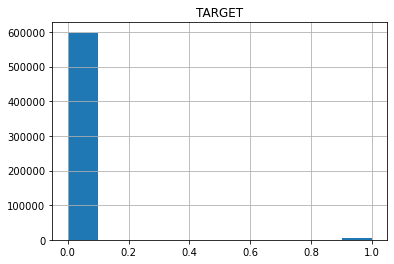

In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(sampling_strategy=0.01)
Xb,Yb = oversample.fit_resample(X_train,Y_train)
Yb_df= pd.DataFrame(Yb)
Yb_df.hist()

array([[<AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

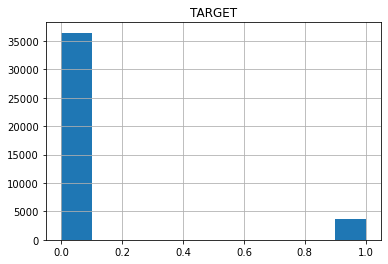

In [37]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy=0.1,random_state=42)
XX,YY = undersample.fit_resample(X_train,Y_train)
XX_df = pd.DataFrame(XX)
YY_df = pd.DataFrame(YY)
YY_df.hist()

In [173]:
Y_train_df = pd.DataFrame(Y_train)
w1 = Y_train_df.value_counts()[1]/Y_train_df.shape[0]
w0 = Y_train_df.value_counts()[0]/Y_train_df.shape[0]
w0/w1

163.97887517146776

In [115]:
X_train_df = pd.DataFrame(X_train)

array([[<AxesSubplot:title={'center':'TARGET'}>]], dtype=object)

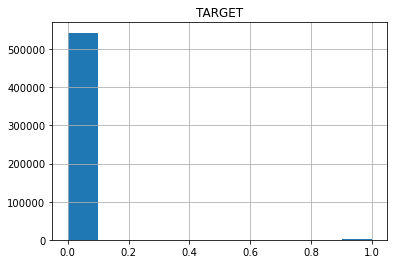

In [116]:
Y_train_df.hist()

## Model Ağırlıklarının Belirlenmesi

In [174]:
w1 = YY_df.value_counts()[1]/YY_df.shape[0]
w0 = YY_df.value_counts()[0]/YY_df.shape[0]
w0/w1

10.0

In [175]:
weights = {0:1, 1:10}

# Model 1

In [190]:
model = Sequential()
model.add(Dense(75, input_dim=X.shape[1], activation="relu", kernel_initializer="he_uniform"))
model.add(Dense(25,activation="relu"))
#model.add(keras.layers.Dropout(0.5))
model.add(Dense(5,activation="relu"))
#model.add(keras.layers.Dropout(0.5))
model.add(Dense(1, activation="sigmoid"))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), 
              optimizer="sgd", 
              metrics=[tf.keras.metrics.AUC()])

In [191]:
import keras
import tensorflow as tf
es_callback = keras.callbacks.EarlyStopping(monitor='val_auc_6', patience=10)

In [192]:
history = model.fit(XX,YY, class_weight=weights, epochs=100,validation_data=(X_test,Y_test),callbacks=es_callback)

Epoch 1/100
1253/1253 [==============================] - 3s 2ms/step - loss: 1.2769 - auc_7: 0.6668 - val_loss: 0.8490 - val_auc_7: 0.8617
Epoch 2/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.1596 - auc_7: 0.8128 - val_loss: 0.7811 - val_auc_7: 0.8661
Epoch 3/100
1253/1253 [==============================] - 3s 2ms/step - loss: 1.1054 - auc_7: 0.8311 - val_loss: 0.7631 - val_auc_7: 0.8793
Epoch 4/100
1253/1253 [==============================] - 3s 2ms/step - loss: 1.0923 - auc_7: 0.8378 - val_loss: 0.7589 - val_auc_7: 0.8906
Epoch 5/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0853 - auc_7: 0.8399 - val_loss: 0.7596 - val_auc_7: 0.8905
Epoch 6/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0800 - auc_7: 0.8433 - val_loss: 0.7619 - val_auc_7: 0.9031
Epoch 7/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0749 - auc_7: 0.8476 - val_loss: 0.7679 - val_auc_7: 0.9095
Epoch 8/100
1253/1253 [====

1253/1253 [==============================] - 2s 2ms/step - loss: 1.0544 - auc_7: 0.8499 - val_loss: 0.7568 - val_auc_7: 0.9046
Epoch 24/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0539 - auc_7: 0.8492 - val_loss: 0.7525 - val_auc_7: 0.8982
Epoch 25/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0530 - auc_7: 0.8513 - val_loss: 0.7544 - val_auc_7: 0.8953
Epoch 26/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0522 - auc_7: 0.8567 - val_loss: 0.7616 - val_auc_7: 0.9002
Epoch 27/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0507 - auc_7: 0.8596 - val_loss: 0.7521 - val_auc_7: 0.8977
Epoch 28/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0503 - auc_7: 0.8571 - val_loss: 0.7521 - val_auc_7: 0.8870
Epoch 29/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0490 - auc_7: 0.8596 - val_loss: 0.7529 - val_auc_7: 0.8874
Epoch 30/100
1253/1253 [=========

Epoch 46/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0383 - auc_7: 0.8633 - val_loss: 0.7477 - val_auc_7: 0.9046
Epoch 47/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0379 - auc_7: 0.8641 - val_loss: 0.7470 - val_auc_7: 0.9034
Epoch 48/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0373 - auc_7: 0.8643 - val_loss: 0.7456 - val_auc_7: 0.9045
Epoch 49/100
1253/1253 [==============================] - 3s 2ms/step - loss: 1.0370 - auc_7: 0.8641 - val_loss: 0.7448 - val_auc_7: 0.9048
Epoch 50/100
1253/1253 [==============================] - 3s 2ms/step - loss: 1.0362 - auc_7: 0.8628 - val_loss: 0.7525 - val_auc_7: 0.9168
Epoch 51/100
1253/1253 [==============================] - 3s 2ms/step - loss: 1.0358 - auc_7: 0.8635 - val_loss: 0.7513 - val_auc_7: 0.9155
Epoch 52/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0353 - auc_7: 0.8624 - val_loss: 0.7431 - val_auc_7: 0.9069
Epoch 53/100
1253/12

1253/1253 [==============================] - 3s 2ms/step - loss: 1.0290 - auc_7: 0.8700 - val_loss: 0.7388 - val_auc_7: 0.9099
Epoch 69/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0278 - auc_7: 0.8708 - val_loss: 0.7350 - val_auc_7: 0.9113
Epoch 70/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0284 - auc_7: 0.8704 - val_loss: 0.7367 - val_auc_7: 0.9120
Epoch 71/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0275 - auc_7: 0.8705 - val_loss: 0.7411 - val_auc_7: 0.9089
Epoch 72/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0268 - auc_7: 0.8698 - val_loss: 0.7392 - val_auc_7: 0.9077
Epoch 73/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0273 - auc_7: 0.8710 - val_loss: 0.7439 - val_auc_7: 0.9088
Epoch 74/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0269 - auc_7: 0.8713 - val_loss: 0.7385 - val_auc_7: 0.9135
Epoch 75/100
1253/1253 [=========

Epoch 91/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0214 - auc_7: 0.8736 - val_loss: 0.7307 - val_auc_7: 0.8889
Epoch 92/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0209 - auc_7: 0.8742 - val_loss: 0.7341 - val_auc_7: 0.9116
Epoch 93/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0214 - auc_7: 0.8738 - val_loss: 0.7393 - val_auc_7: 0.9113
Epoch 94/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0222 - auc_7: 0.8732 - val_loss: 0.7291 - val_auc_7: 0.8891
Epoch 95/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0203 - auc_7: 0.8746 - val_loss: 0.7367 - val_auc_7: 0.8974
Epoch 96/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0203 - auc_7: 0.8751 - val_loss: 0.7402 - val_auc_7: 0.8955
Epoch 97/100
1253/1253 [==============================] - 2s 2ms/step - loss: 1.0209 - auc_7: 0.8742 - val_loss: 0.7388 - val_auc_7: 0.9087
Epoch 98/100
1253/12

In [193]:
predict_nn = model.predict(X_test)

In [194]:
roc_auc_score(Y_test,predict_nn)

0.9424252199157824

In [38]:
from imblearn.ensemble import BalancedBaggingClassifier
bag_model = BalancedBaggingClassifier()


In [39]:
bag_model.fit(XX,YY)

C:\Users\ENES\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


BalancedBaggingClassifier()

In [40]:
predict_bag = bag_model.predict_proba(X_test)

In [41]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,predict_bag[:,1])

0.9040746872700515

In [42]:
predict_test_bag = bag_model.predict_proba(TEST_X)

In [43]:
TEST_PREDICT_DF = pd.DataFrame(predict_test_bag[:,1],columns=["PREDICTED"])

In [44]:
predict_test_bag[:,1]

array([0.9, 0.1, 0.8, ..., 0. , 0. , 0.2])

In [45]:
TEST_PREDICT_DF

,PREDICTED
0,0.9
1,0.1
2,0.8
3,1.0
4,0.9
...,...
326227,0.0
326228,0.0
326229,0.0
326230,0.0


In [46]:
TEST_PREDICT_DF.to_csv("predictions_12.csv")

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rf_clf = RandomForestClassifier(n_estimators=15, class_weight="balanced")

In [25]:
rf_clf.fit(XX,YY)

<ipython-input-25-2d13dfa35135>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_clf.fit(XX,YY)


RandomForestClassifier(class_weight='balanced', n_estimators=15)

In [26]:
predict_rf = rf_clf.predict_proba(X_test)

In [27]:
roc_auc_score(Y_test,predict_rf[:,1])

0.8861662987490803

In [28]:
predict_test_rf = rf_clf.predict_proba(TEST_X)

In [29]:
TEST_PREDICT_DF = pd.DataFrame(predict_test_rf[:,1],columns=["PREDICTED"])
TEST_PREDICT_DF.to_csv("predictions_11.csv")

In [30]:
from imblearn.ensemble import EasyEnsembleClassifier
easy_clf = EasyEnsembleClassifier(n_estimators=10)

In [31]:
easy_clf.fit(XX,YY)

C:\Users\ENES\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


EasyEnsembleClassifier()

In [32]:
predict_easy = easy_clf.predict_proba(X_test)
roc_auc_score(Y_test,predict_easy[:,1])

0.8797139440765269

In [100]:
predict_test_easy = easy_clf.predict_proba(TEST_X)

In [101]:
TEST_PREDICT_DF = pd.DataFrame(predict_test_easy[:,1],columns=["PREDICTED"])
TEST_PREDICT_DF.to_csv("predictions9.csv")